In [8]:
# Assignment 2: Feed-forward Neural Network using Keras & TensorFlow

# -----------------------------
# a) Import necessary packages
# -----------------------------
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.datasets import mnist
import matplotlib.pyplot as plt
import numpy as np



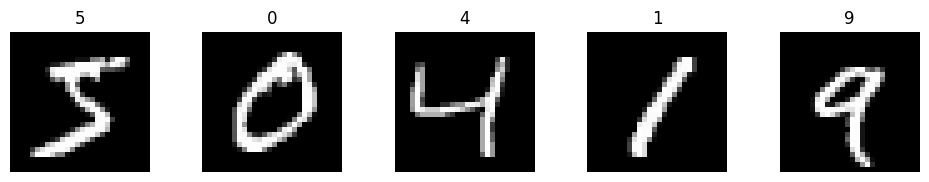

In [2]:
# -----------------------------
# b) Load training/testing data (MNIST)
# -----------------------------
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Normalize
x_train = x_train / 255.0
x_test = x_test / 255.0

plt.figure(figsize=(12, 4))
for i in range (5):
    plt.subplot(2,5,i+1)
    plt.imshow(x_train[i], cmap='gray')
    plt.title(y_train[i])
    plt.axis('off')
plt.show()

In [3]:
# ------------------------------------
# c. Defining the model’s architecture
# ------------------------------------

model = Sequential([
    Flatten(input_shape=(28, 28)),          # Flatten 28x28 image to 784 feature vector
    Dense(256, activation='relu'),          # Hidden layer
    Dense(128, activation='relu'),          # Hidden layer
    Dense(10, activation='softmax')         # Output layer (10 classes)
])

model.summary()

/Users/mayur/Library/Python/3.9/lib/python/site-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │       200,960 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 235,146 (918.54 KB)

 Trainable params: 235,146 (918.54 KB)

 Non-trainable params: 0 (0.00 B)

In [4]:
# -----------------------------
# d) Train using SGD
# -----------------------------
optimizer = SGD(learning_rate=0.01)
model.compile(optimizer=optimizer,
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(x_train, y_train, epochs=10, validation_split=0.1)

Epoch 1/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 1s 585us/step - accuracy: 0.7202 - loss: 1.0751 - val_accuracy: 0.9273 - val_loss: 0.2716
Epoch 2/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 1s 544us/step - accuracy: 0.9098 - loss: 0.3094 - val_accuracy: 0.9410 - val_loss: 0.2079
Epoch 3/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 1s 550us/step - accuracy: 0.9307 - loss: 0.2445 - val_accuracy: 0.9478 - val_loss: 0.1881
Epoch 4/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 1s 551us/step - accuracy: 0.9395 - loss: 0.2060 - val_accuracy: 0.9550 - val_loss: 0.1622
Epoch 5/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 1s 551us/step - accuracy: 0.9484 - loss: 0.1818 - val_accuracy: 0.9620 - val_loss: 0.1412
Epoch 6/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 1s 548us/step - accuracy: 0.9539 - loss: 0.1647 - val_accuracy: 0.9652 - val_loss: 0.1284
Epoch 7/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 1s 586us/step - accuracy: 0.9580 - loss: 0.1465 - val_accuracy: 0.9675 - val_loss: 0.1209
Epoch 8/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 1s 552us/step - accuracy: 0.9630 -

In [5]:
# -----------------------------
# e) Evaluate the model
# -----------------------------
test_loss, test_acc = model.evaluate(x_test, y_test)
print("Test Accuracy:", test_acc)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 376us/step - accuracy: 0.9595 - loss: 0.1366
Test Accuracy: 0.9657999873161316


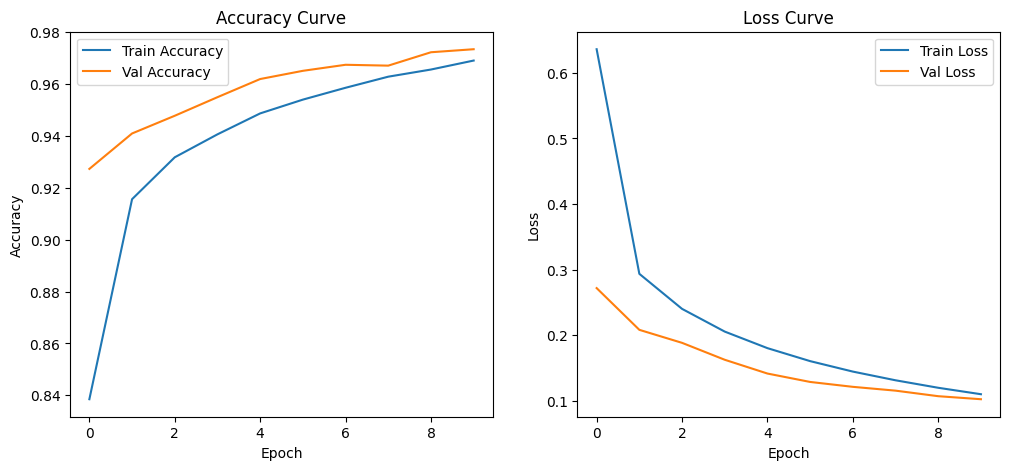

In [6]:
# -----------------------------
# f) Plot training loss and accuracy
# -----------------------------

plt.figure(figsize=(12,5))

# Accuracy graph
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.title("Accuracy Curve")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()


# Loss graph
plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title("Loss Curve")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()


plt.show()


313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 318us/step


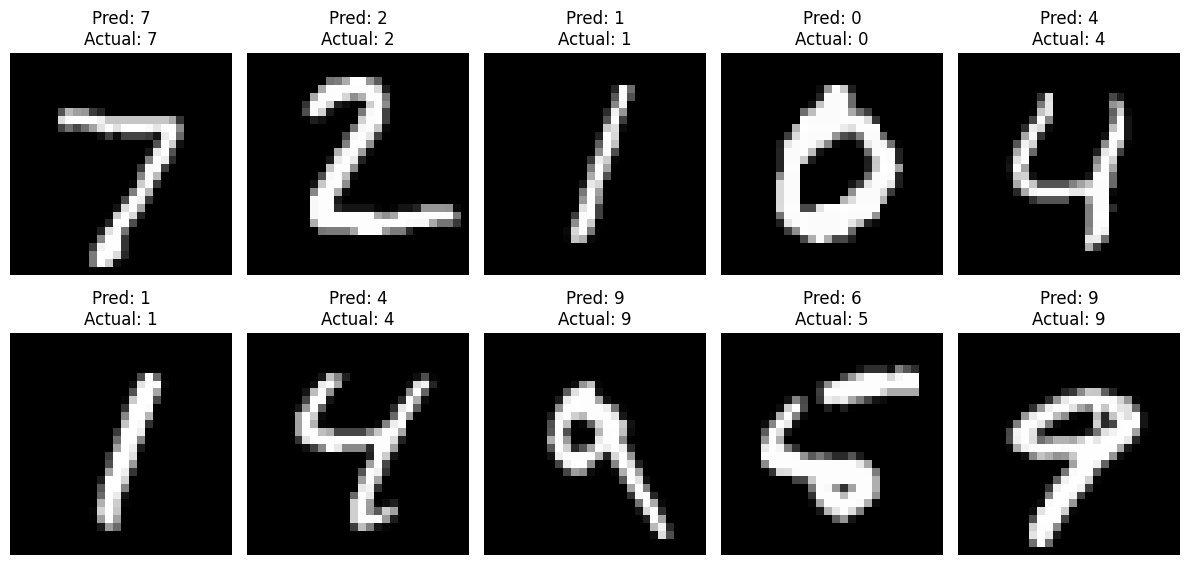

In [15]:
# -----------------------------
# g) Predict on test images
# -----------------------------

# Predict probabilities
predictions = model.predict(x_test)

# Convert probabilities to class labels
predicted_labels = np.argmax(predictions, axis=1)

# Show first 10 test images with predictions
plt.figure(figsize=(12, 6))
for i in range(10):
    plt.subplot(2, 5, i+1)
    plt.imshow(x_test[i], cmap='gray')
    plt.title(f"Pred: {predicted_labels[i]}\nActual: {y_test[i]}")
    plt.axis('off')

plt.tight_layout()
plt.show()